In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential  #for train
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD



Load and preprocess the CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #tuple data give

In [ ]:
y_train = y_train.reshape(-1,) #convert to 1D array
y_test = y_test.reshape(-1,)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

Define the network architecture

In [ ]:
ffnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(256, activation='relu'),    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),    # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')    # Output layer with softmax activation for classification
])
ffnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fitted = ffnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8670 - accuracy: 0.3295 - val_loss: 1.7217 - val_accuracy: 0.3791
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6819 - accuracy: 0.4031 - val_loss: 1.6270 - val_accuracy: 0.4180
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6038 - accuracy: 0.4288 - val_loss: 1.6145 - val_accuracy: 0.4237
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5505 - accuracy: 0.4509 - val_loss: 1.5607 - val_accuracy: 0.4394
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5071 - accuracy: 0.4662 - val_loss: 1.5045 - val_accuracy: 0.4646
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4737 - accuracy: 0.4794 - val_loss: 1.5303 - val_accuracy: 0.4547
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4417 - accuracy: 0.4899 - val_loss: 1.4943 - val_accuracy:

Evaluate the network

In [ ]:
test_loss, test_acc = ffnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 1.4422 - accuracy: 0.4893
Test accuracy: 48.93%


Plot the training loss and accuracy

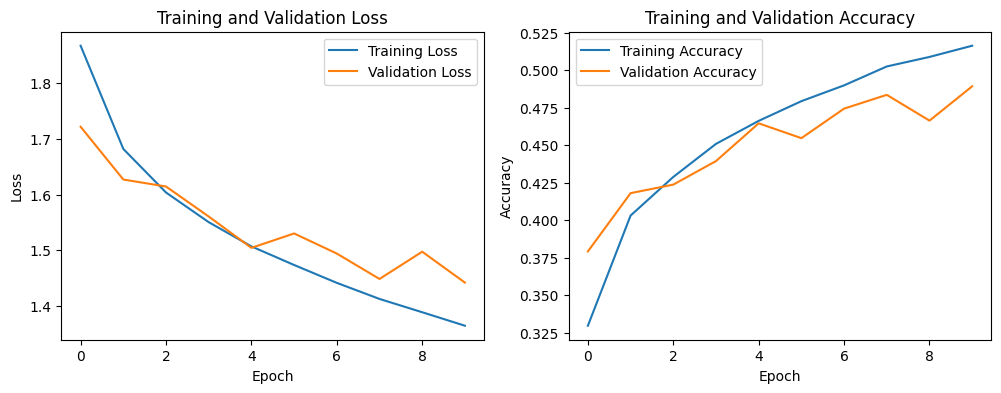

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()